# 作業目標:
    運用 Keras 模組建構CNN, 了解 CNN 的架構
    
    

# 作業重點
(1)嘗試比對 Dense 與 layers.Conv2D 架構NN 的差異

(2) 有沒有Pooling layer, 對於參數量的差異

注意: input_shape 請勿修改

In [1]:
#導入相關模組
import keras
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense

#確認keras 版本
print(keras.__version__)

Using TensorFlow backend.


2.3.1


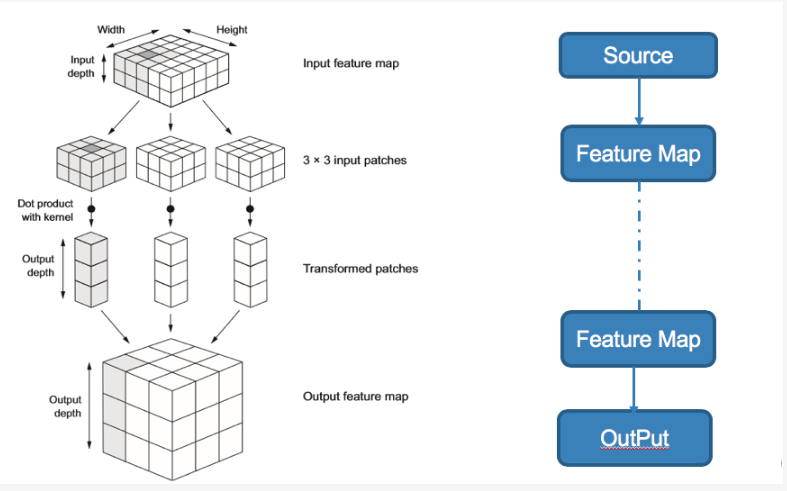

### Dense Model

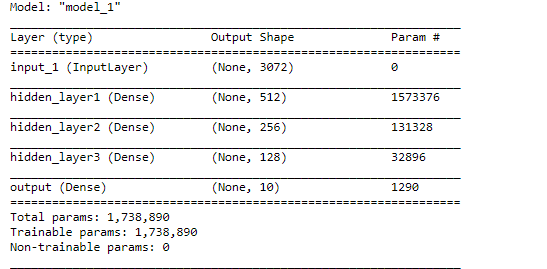

### Conv Model

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2,2))
model.add(layers.Conv2D(25, (3, 3)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(units=100))
model.add(Activation('relu'))
model.add(Dense(units=10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 25)        7225      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 25)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 625)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               62600     
_________________________________________________________________
activation_1 (Activation)    (None, 100)              

#### 兩種模型最大差異在於參數數量，Dense Model 之參數量極多，Conv2d Model 則較少

### Conv Model (Without Pooling)

In [3]:
#建立一個序列模型
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(layers.Conv2D(25, (3, 3)))
model.add(Flatten())
model.add(Dense(units=100))
model.add(Activation('relu'))
model.add(Dense(units=10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 25)        7225      
_________________________________________________________________
flatten_2 (Flatten)          (None, 14400)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               1440100   
_________________________________________________________________
activation_3 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_4 (Activation)    (None, 10)               

#### 未經Max Pooling之模型參數量亦會爆炸